<a href="https://colab.research.google.com/github/ShoryaDubey/ML/blob/main/PolyReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirajdeepbhandari/polynomial-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/polynomial-regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


In [ ]:

df = pd.read_csv('/kaggle/input/polynomial-regression/Ice_cream selling data.csv')

In [ ]:
print(df)

    Temperature (°C)  Ice Cream Sales (units)
0          -4.662263                41.842986
1          -4.316559                34.661120
2          -4.213985                39.383001
3          -3.949661                37.539845
4          -3.578554                32.284531
5          -3.455712                30.001138
6          -3.108440                22.635401
7          -3.081303                25.365022
8          -2.672461                19.226970
9          -2.652287                20.279679
10         -2.651498                13.275828
11         -2.288264                18.123991
12         -2.111870                11.218294
13         -1.818938                10.012868
14         -1.660348                12.615181
15         -1.326379                10.957731
16         -1.173123                 6.689123
17         -0.773330                 9.392969
18         -0.673753                 5.210163
19         -0.149635                 4.673643
20         -0.036156              

In [ ]:
Y = df.iloc[:, -1].values
X = df.iloc[:, 0:-1].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [ ]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

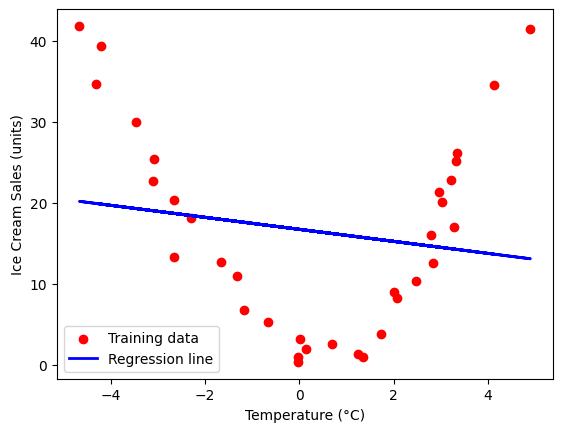

In [ ]:
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.plot(x_train, lr.predict(x_train), color='blue', linewidth=2, label='Regression line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()

In [ ]:
pf = PolynomialFeatures(2)
x_pf = pf.fit_transform(x_train)

In [ ]:
lr_pf = LinearRegression()
lr_pf.fit(x_pf, y_train)

LinearRegression()

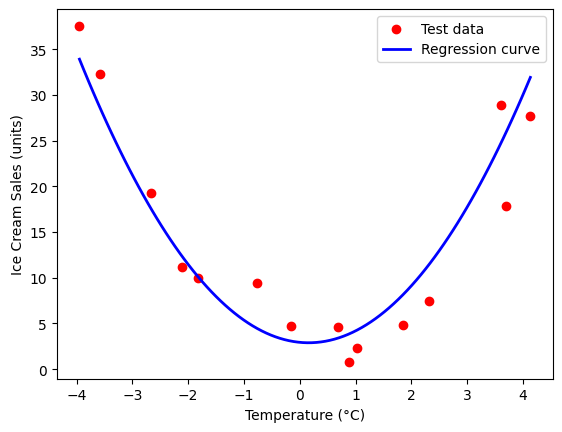

In [ ]:
# Scatter plot of test data
plt.scatter(x_test, y_test, color='red', label='Test data')

# Sort x values for smooth curve
x_grid = np.linspace(min(x_test), max(x_test), 100).reshape(-1, 1)

# Predict using the trained model
plt.plot(x_grid, lr_pf.predict(pf.transform(x_grid)),
         color='blue', linewidth=2, label='Regression curve')

# Labels
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()


In [ ]:
y_pred = lr_pf.predict(pf.transform(x_test))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # root mean squared error
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 13.36027498142077
RMSE: 3.655170992090626
R² Score: 0.8994543494249359


In [ ]:
import numpy as np

# Example input
temp_today = np.array([[1]])   # 2D array because sklearn expects this shape

# Transform input with the same PolynomialFeatures
temp_today_poly = pf.transform(temp_today)

# Predict sales
predicted_sales = lr_pf.predict(temp_today_poly)

print(f"Predicted ice cream sales at 30°C: {predicted_sales[0]:.2f} units")


Predicted ice cream sales at 30°C: 4.18 units
